In [1]:
ls -lh /home/spetz/SPICY\ sources/G*/*fits

-rw-r--r-- 1 spetz adamginsburg 197K May  9  2022 /home/spetz/SPICY sources/G12/SPICYTableG12.fits
-rw-r--r-- 1 spetz adamginsburg 197K May 10  2022 /home/spetz/SPICY sources/G333/SPICYTableG333.fits
-rw-r--r-- 1 spetz adamginsburg 197K May  9  2022 /home/spetz/SPICY sources/G351/SPICYTableG351.fits


In [2]:
cp /home/spetz/SPICY\ sources/G351/SPICYTableG351.fits /blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/tables/tbl_G351.fits

In [3]:
cp /home/spetz/SPICY\ sources/G333/SPICYTableG333.fits /blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/tables/tbl_G333.fits

In [4]:
cp /home/spetz/SPICY\ sources/G12/SPICYTableG12.fits /blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/tables/tbl_G012.fits

In [5]:
cp /blue/adamginsburg/morganhimes/SourceTableBuilding/Notebooks/SPICYTable_G008.fits  /blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/tables/tbl_G008.fits

In [6]:
ls -lh /blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/tables/tbl_G008.fits

-rw-rwxr--+ 1 morganhimes adamginsburg 79K Apr  9 11:31 /blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/tables/tbl_G008.fits*


In [7]:
#setfacl -m group:adamginsburg:rw /blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/tables/tbl_G008.fits

In [8]:
ls -lh /blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/tables

total 624K
-rw-r--r--+ 1 morganhimes  adamginsburg 192K May  2  2022 SPICYTableG008.fits
-rw-rwxr--+ 1 morganhimes  adamginsburg  79K Apr  9 11:31 tbl_G008.fits*
-rw-rwxr--+ 1 adamginsburg adamginsburg 197K Apr  9 11:31 tbl_G012.fits*
-rw-rw-r--+ 1 btingle      adamginsburg  85K Apr 12  2022 tbl_G328
-rw-rw-r--+ 1 btingle      adamginsburg  85K Mar 22  2022 tbl_G328.fits
-rw-rwxr--+ 1 adamginsburg adamginsburg 197K Apr  9 11:31 tbl_G333.fits*
-rw-rw-r--+ 1 adamginsburg adamginsburg 197K Apr  9 11:31 tbl_G351.fits


%%bash
setfacl -R -m d:u:morganhimes:rwX /blue/adamginsburg/adamginsburg/SPICY_ALMAIMF/tables
setfacl -R -m u:morganhimes:rwX /blue/adamginsburg/adamginsburg/SPICY_ALMAIMF/tables
setfacl -R -m u:btingle:rwX /blue/adamginsburg/adamginsburg/SPICY_ALMAIMF/tables
setfacl -R -m d:u:btingle:rwX /blue/adamginsburg/adamginsburg/SPICY_ALMAIMF/tables
setfacl -R -m u:spetz:rwX /blue/adamginsburg/adamginsburg/SPICY_ALMAIMF/tables
setfacl -R -m d:u:spetz:rwX /blue/adamginsburg/adamginsburg/SPICY_ALMAIMF/tables

In [9]:
g328fn = '/blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/tables/tbl_G328.fits'
g008fn = '/blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/tables/tbl_G008.fits'
g351fn = '/blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/tables/tbl_G351.fits'
g012fn = '/blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/tables/tbl_G012.fits'
g333fn = '/blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/tables/tbl_G333.fits'

In [10]:
ls -lhrt $g328fn

-rw-rw-r--+ 1 btingle adamginsburg 85K Mar 22  2022 /blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/tables/tbl_G328.fits


In [11]:
ls -lhrt $g008fn

-rw-rwxr--+ 1 morganhimes adamginsburg 79K Apr  9 11:31 /blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/tables/tbl_G008.fits*


In [12]:
ls -lh $g351fn

-rw-rw-r--+ 1 adamginsburg adamginsburg 197K Apr  9 11:31 /blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/tables/tbl_G351.fits


In [13]:
from astropy.table import Table, vstack

In [14]:
g008tb = Table.read(g008fn)
len(g008tb)

13

In [15]:
g008tb['Luminosity Median', 'LOS mass Median']

Luminosity Median,LOS mass Median
float64,float64
2.4355659269151393,-1.0843212908102347
2.585646937969941,-0.28943289716324627
1.6736763437687703,-0.2774978452722406
2.5703837214870386,0.12525864858286667
2.3120088982061273,-1.1528129155157605
3.481778050866666,-0.44445408096464634
5.220798308456374,-0.3343741460964237
2.2191380561604026,-1.3715946891945787
2.179230241466306,0.6620143494668901


In [16]:
g328tb = Table.read(g328fn)
len(g328tb)

17

In [17]:
g351tb = Table.read(g351fn)
len(g351tb)

118

In [18]:
g333tb = Table.read(g333fn)
len(g333tb)

118

In [19]:
g012tb = Table.read(g012fn)
len(g012tb)

118

In [20]:
tb = vstack([g008tb, g328tb, g351tb, g333tb, g012tb])

In [21]:
%matplotlib inline
import pylab as pl
pl.rcParams['figure.facecolor']='w'

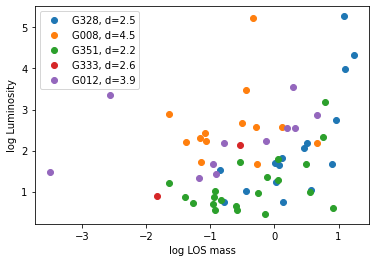

In [22]:
pl.plot(g328tb['LOS mass Median'], g328tb['Luminosity Median'], 'o', label='G328, d=2.5')
pl.plot(g008tb['LOS mass Median'], g008tb['Luminosity Median'], 'o', label='G008, d=4.5')
pl.plot(g351tb['LOS mass Median'], g351tb['Luminosity Median'], 'o', label='G351, d=2.2')
pl.plot(g333tb['LOS mass Median'], g333tb['Luminosity Median'], 'o', label='G333, d=2.6')
pl.plot(g012tb['LOS mass Median'], g012tb['Luminosity Median'], 'o', label='G012, d=3.9')
pl.xlabel("log LOS mass")
pl.ylabel("log Luminosity")
pl.legend(loc='upper left')

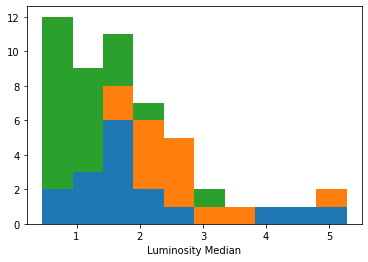

In [23]:
pl.hist([g328tb['Luminosity Median'],
g008tb['Luminosity Median'],
g351tb['Luminosity Median'],], histtype='barstacked')
pl.xlabel("Luminosity Median");

In [24]:
g328tb['ALMA-IMF_1mm_flux', 'ALMA-IMF_1mm_eflux',]

ALMA-IMF_1mm_flux,ALMA-IMF_1mm_eflux
Jy / beam,Jy / beam
float64,float64
--,0.38574923894221214
--,0.38574923894221214
--,0.38574923894221214
--,--
--,--
1.3557265677295753,--
--,0.38574923894221214
82.70039656216524,0.38574923894221214


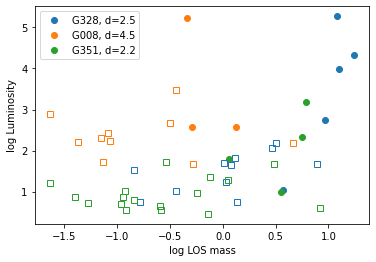

In [25]:
Lg328, = pl.plot(g328tb['LOS mass Median'][~g328tb['ALMA-IMF_1mm_flux'].mask], g328tb['Luminosity Median'][~g328tb['ALMA-IMF_1mm_flux'].mask], 'o', label='G328, d=2.5')
Lg008, = pl.plot(g008tb['LOS mass Median'][~g008tb['ALMA-IMF_1mm_flux'].mask], g008tb['Luminosity Median'][~g008tb['ALMA-IMF_1mm_flux'].mask], 'o', label='G008, d=4.5')
Lg351, = pl.plot(g351tb['LOS mass Median'][~g351tb['ALMA-IMF_1mm_flux'].mask], g351tb['Luminosity Median'][~g351tb['ALMA-IMF_1mm_flux'].mask], 'o', label='G351, d=2.2')
pl.plot(g328tb['LOS mass Median'][g328tb['ALMA-IMF_1mm_flux'].mask], g328tb['Luminosity Median'][g328tb['ALMA-IMF_1mm_flux'].mask], 's', markerfacecolor='none', color=Lg328.get_color())
pl.plot(g008tb['LOS mass Median'][g008tb['ALMA-IMF_1mm_flux'].mask], g008tb['Luminosity Median'][g008tb['ALMA-IMF_1mm_flux'].mask], 's', markerfacecolor='none', color=Lg008.get_color())
pl.plot(g351tb['LOS mass Median'][g351tb['ALMA-IMF_1mm_flux'].mask], g351tb['Luminosity Median'][g351tb['ALMA-IMF_1mm_flux'].mask], 's', markerfacecolor='none', color=Lg351.get_color())

pl.xlabel("log LOS mass")
pl.ylabel("log Luminosity")
pl.legend(loc='best')

In [26]:
g328tb['Luminosity Median', 'LOS mass Median']

Luminosity Median,LOS mass Median
float64,float64
1.687230420005407,0.012554904129778027
1.5183951298045943,--
1.0108152154722867,-0.4470735216522169
2.184433739182887,0.5040565852889713
1.678222681227759,0.8954165552891606
1.0477507575912837,0.5691429405806151
1.5173303957001467,-0.8447692605191803
3.9939283913935153,1.1016593628664675
4.325800410500175,1.2434300964079688


In [27]:
g008tb['Luminosity Median', 'LOS mass Median']

Luminosity Median,LOS mass Median
float64,float64
2.4355659269151393,-1.0843212908102347
2.585646937969941,-0.28943289716324627
1.6736763437687703,-0.2774978452722406
2.5703837214870386,0.12525864858286667
2.3120088982061273,-1.1528129155157605
3.481778050866666,-0.44445408096464634
5.220798308456374,-0.3343741460964237
2.2191380561604026,-1.3715946891945787
2.179230241466306,0.6620143494668901


In [28]:
g351tb['Luminosity Median', 'LOS mass Median'][~g351tb['Luminosity Median'].mask]

Luminosity Median,LOS mass Median
float64,float64
1.3662943274198005,-0.117265790199047
1.012821606474041,-0.9255992241378277
0.8781899689371057,-0.9451117831004728
0.45602073133754906,-0.1425136619465457
0.9607500856306702,-0.24729731848222905
1.6805399856279994,0.4893056494920608
0.7996119018530254,-0.8365832680832903
0.7220196335963861,-1.2748184138898433
0.6084754362027296,0.9208014987643665


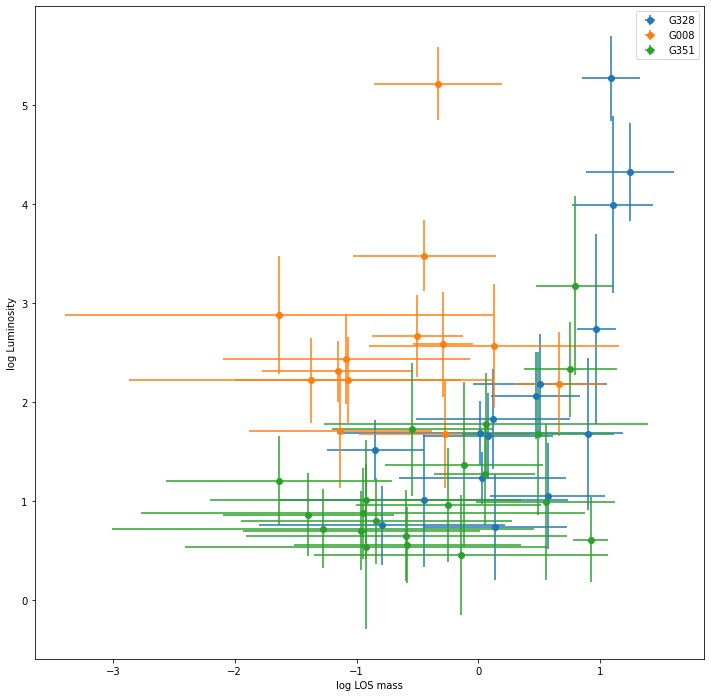

In [29]:
pl.figure(figsize=(12,12))
pl.errorbar(g328tb['LOS mass Median'], g328tb['Luminosity Median'], xerr=g328tb['LOS mass MAD'], yerr=g328tb['Luminosity MAD'], marker='o', linestyle='none', label='G328')
pl.errorbar(g008tb['LOS mass Median'], g008tb['Luminosity Median'], xerr=g008tb['LOS mass MAD'], yerr=g008tb['Luminosity MAD'], marker='o', linestyle='none', label='G008')
pl.errorbar(g351tb['LOS mass Median'], g351tb['Luminosity Median'], xerr=g351tb['LOS mass MAD'], yerr=g351tb['Luminosity MAD'], marker='o', linestyle='none', label='G351')

pl.xlabel("log LOS mass")
pl.ylabel("log Luminosity")
pl.legend(loc='best')

In [30]:
tb

SPICY,ra,dec,l,b,p1,p2,p3,class,silicate,pah,alpha,alpha_8,alpha_24,alpha_w4,env,group,var,nr,r,sigmar,skewnessr,Spitzer,mag3_6,e_mag3_6,mag4_5,e_mag4_5,mag5_8,e_mag5_8,mag8_0,e_mag8_0,csf,m3_6,m4_5,m5_8,m8_0,2MASS,UKIDSS,VIRAC,GaiaDR2,MIPS,AllWISE,ZTFDR3,in_ALMAIMF,ALMAIMF_FIELDID,70,160,250,350,500,Spitzer/MIPS.24mu_flux,Spitzer/MIPS.24mu_eflux,M24_flux_uplim,RA_ICRS,DE_ICRS,Ksmag,KsEll,pm,e_pm,pmRA,e_pmRA,pmDE,e_pmDE,Nep,flgrel,Zmag,Zell,Ymag,Yell,Jmag,Jell,Hmag,Hell,Zdetflg,Ydetflg,Jdetflg,Hdetflg,ALMA-IMF_3mm_flux,ALMA-IMF_3mm_eflux,ALMA-IMF_1mm_flux,ALMA-IMF_1mm_eflux,Paranal/VISTA.Y_flux,Paranal/VISTA.Y_eflux,Paranal/VISTA.Z_flux,Paranal/VISTA.Z_eflux,Paranal/VISTA.J_flux,Paranal/VISTA.J_eflux,Paranal/VISTA.H_flux,Paranal/VISTA.H_eflux,Paranal/VISTA.Ks_flux,Paranal/VISTA.Ks_eflux,Spitzer/IRAC.I1_flux,Spitzer/IRAC.I1_eflux,Spitzer/IRAC.I2_flux,Spitzer/IRAC.I2_eflux,Spitzer/IRAC.I3_flux,Spitzer/IRAC.I3_eflux,Spitzer/IRAC.I4_flux,Spitzer/IRAC.I4_eflux,Herschel/Pacs.blue_eflux,Herschel/Pacs.red_eflux,Herschel/SPIRE.PSW_eflux,Herschel/SPIRE.PMW_eflux,Herschel/SPIRE.PLW_eflux,Herschel/Pacs.blue_flux,Herschel/Pacs.red_flux,Herschel/SPIRE.PSW_flux,Herschel/SPIRE.PMW_flux,Herschel/SPIRE.PLW_flux,Temperature mean,Temperature standard deviation,Temperature Median,Temperature MAD,Luminosity mean,Luminosity standard deviation,Luminosity Median,Luminosity MAD,Radius mean,Radius standard deviation,Radius Median,Radius MAD,LOS mass mean,LOS mass standard deviation,LOS mass Median,LOS mass MAD,Sphere mass mean,Sphere mass standard deviation,Sphere mass Median,Sphere mass MAD,Distance mean,Distance standard deviation,Distance Median,Distance MAD,Extinction mean,Extinction standard deviation,Extinction Median,Extinction MAD,Included Geometries,Chi2 threshold,NumberOfModels,Disk mass mean,Disk mass standard deviation,Disk mass Median,Disk mass MAD
,deg,deg,deg,deg,,,,,,,,,,,,,,,,,,,mag,mag,mag,mag,mag,mag,mag,mag,,,,,,,,,,,,,,,Jy / pix,Jy / pix,MJy / sr,MJy / sr,MJy / sr,mJy,mJy,MJy / sr,deg,deg,mag,,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,,mag,,mag,,mag,,mag,,,,,,mJy / beam,mJy / beam,mJy / beam,mJy / beam,,,,,,,,,,,mJy,mJy mag,mJy,mJy mag,,mag,,mag,mJy,mJy,mJy,mJy,mJy,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
int64,float64,float64,float64,float64,float32,float32,float32,bytes9,bool,bool,float64,float64,float64,float64,bytes7,bytes10,int16,int16,float64,float64,float64,bytes26,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,int32,bytes18,bytes19,int32,int64,bytes18,bytes20,int64,bool,bytes8,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,int16,uint8,float64,float32,float64,float32,float32,float32,float64,float32,uint8,uint8,uint8,uint8,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes143,float64,int64,float64,float64,float64,float64
73642,271.576385,-21.618896,8.673839,-0.350408,--,--,0.93,uncertain,False,False,--,--,--,--,EnvIII,G8.7-0.3,--,--,--,--,--,SSTGLMC G008.6738-00.3504,10.825,0.064,9.814,0.073,9.117,0.166,--,--,0,3,4,3,0,,,206172820,--,,J180618.30-213708.5,--,True,G008,1.115453756812632,3.741185599705438,11824.778268001402,4633.310050425159,2122.0290014204234,--,--,--,271.576461,-21.618870,14.429,0.1,5.45,0.73,5.02,0.72,2.134,0.774,210,1,--,--,--,--,--,--,--,--,1,1,1,1,--,9.742119164913867e-05,--,0.0004115273830446027,--,--,--,--,--,--,--,--,1.1328994,0.1,12.966661,0.76134527,21.249166,1.4231092,25.675962,3.9102838,--,--,1115.453756812632,3741.18559970543

In [31]:
import glob

In [32]:
tbfns = glob.glob("/blue/adamginsburg/richardson.t/research/protostellar_evolution/turbulentcore/protostellar_evolution_m*")
tbs_tc = {}
for tbfn in tbfns:
    tb = Table.read(tbfn, format='ascii')
    tbs_tc[tb['Stellar_Mass'][-1]] = tb

In [33]:
tbfns = glob.glob("/blue/adamginsburg/richardson.t/research/protostellar_evolution/isothermal/protostellar_evolution_m*")
tbs_is = {}
for tbfn in tbfns:
    tb = Table.read(tbfn, format='ascii')
    tbs_is[tb['Stellar_Mass'][-1]] = tb

In [34]:
from astropy import units as u

In [35]:
import numpy as np

/scratch/local/59394008/ipykernel_29425/2952982823.py:7: RuntimeWarning: divide by zero encountered in log10
  pl.plot(np.log10(mass*3 - tb['Stellar_Mass']*3), np.log10(tb['Total_Luminosity']),


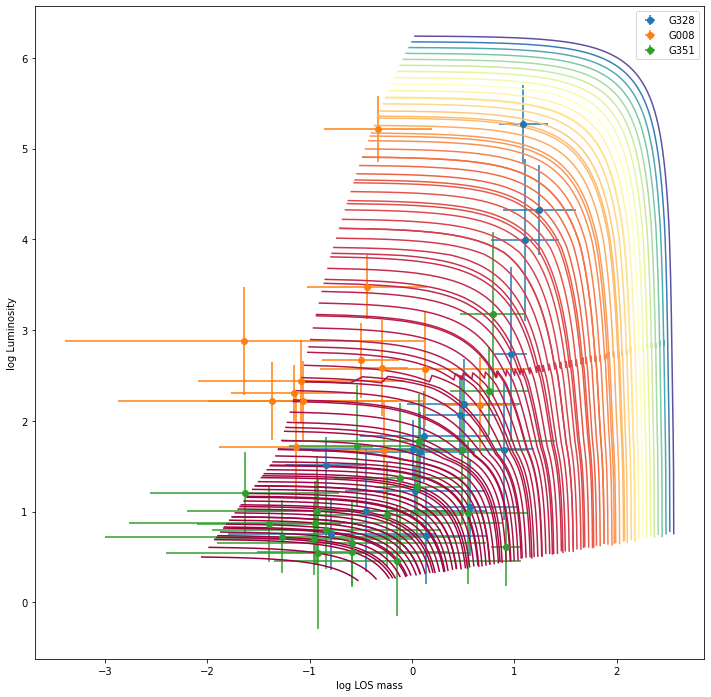

In [36]:
pl.figure(figsize=(12,12))
pl.errorbar(g328tb['LOS mass Median'], g328tb['Luminosity Median'], xerr=g328tb['LOS mass MAD'], yerr=g328tb['Luminosity MAD'], marker='o', linestyle='none', label='G328')
pl.errorbar(g008tb['LOS mass Median'], g008tb['Luminosity Median'], xerr=g008tb['LOS mass MAD'], yerr=g008tb['Luminosity MAD'], marker='o', linestyle='none', label='G008')
pl.errorbar(g351tb['LOS mass Median'], g351tb['Luminosity Median'], xerr=g351tb['LOS mass MAD'], yerr=g351tb['Luminosity MAD'], marker='o', linestyle='none', label='G351')

for mass,tb in tbs_tc.items():
    pl.plot(np.log10(mass*3 - tb['Stellar_Mass']*3), np.log10(tb['Total_Luminosity']),
            color=pl.cm.Spectral(mass/120))

pl.xlabel("log LOS mass")
pl.ylabel("log Luminosity")
pl.legend(loc='best')

/scratch/local/59394008/ipykernel_29425/800670549.py:7: RuntimeWarning: divide by zero encountered in log10
  pl.plot(np.log10(mass*3 - tb['Stellar_Mass']*3), np.log10(tb['Total_Luminosity']),


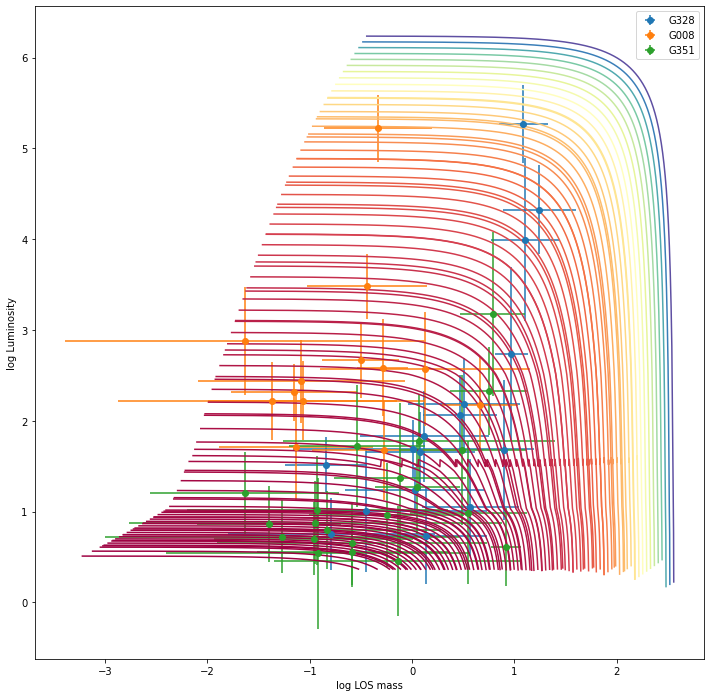

In [37]:
pl.figure(figsize=(12,12))
pl.errorbar(g328tb['LOS mass Median'], g328tb['Luminosity Median'], xerr=g328tb['LOS mass MAD'], yerr=g328tb['Luminosity MAD'], marker='o', linestyle='none', label='G328')
pl.errorbar(g008tb['LOS mass Median'], g008tb['Luminosity Median'], xerr=g008tb['LOS mass MAD'], yerr=g008tb['Luminosity MAD'], marker='o', linestyle='none', label='G008')
pl.errorbar(g351tb['LOS mass Median'], g351tb['Luminosity Median'], xerr=g351tb['LOS mass MAD'], yerr=g351tb['Luminosity MAD'], marker='o', linestyle='none', label='G351')

for mass,tb in tbs_is.items():
    pl.plot(np.log10(mass*3 - tb['Stellar_Mass']*3), np.log10(tb['Total_Luminosity']),
            color=pl.cm.Spectral(mass/120))

pl.xlabel("log LOS mass")
pl.ylabel("log Luminosity")
pl.legend(loc='best')

In [38]:
(tb['Time']*u.s).to(u.Myr)

<Quantity [0.00628104, 0.01256209, 0.01884313, 0.02512418, 0.03140522,
           0.03768626, 0.04396731, 0.05024835, 0.0565294 , 0.06281044,
           0.06909148, 0.07537253, 0.08165357, 0.08793462, 0.09421566,
           0.10049671, 0.10677775, 0.11305879, 0.11933984, 0.12562088,
           0.13190193, 0.13818297, 0.14446401, 0.15074506, 0.1570261 ,
           0.16330715, 0.16958819, 0.17586923, 0.18215028, 0.18843132,
           0.19471237, 0.20099341, 0.20727445, 0.2135555 , 0.21983654,
           0.22611759, 0.23239863, 0.23867967, 0.24496072, 0.25124176,
           0.25752281, 0.26380385, 0.2700849 , 0.27636594, 0.28264698,
           0.28892803, 0.29520907, 0.30149012, 0.30777116, 0.3140522 ,
           0.32033325, 0.32661429, 0.33289534, 0.33917638, 0.34545742,
           0.35173847, 0.35801951, 0.36430056, 0.3705816 , 0.37686264,
           0.38314369, 0.38942473, 0.39570578, 0.40198682, 0.40826786,
           0.41454891, 0.42082995, 0.427111  , 0.43339204, 0.43967309,
      

In [39]:
times_is = (np.geomspace(1e3, 1e8, 500)*u.yr).to(u.s).value

tbfns = glob.glob("/blue/adamginsburg/richardson.t/research/protostellar_evolution/isothermal/protostellar_evolution_m*")

massgrid_is = np.zeros([len(tbfns), len(times_is)])
lumgrid_is = np.zeros([len(tbfns), len(times_is)])

for ii, tbfn in enumerate(tbfns):
    tb = Table.read(tbfn, format='ascii')
    m_final = tb['Stellar_Mass'].max()
    masses = np.interp(times_is, tb['Time'], tb['Stellar_Mass'], left=np.nan, right=np.nan)
    luminosity = np.interp(times_is, tb['Time'], tb['Total_Luminosity'], left=np.nan, right=np.nan)
    #print(tb['Time'].min()-times.min(), tb['Time'].max()-times.max())
    #print(masses.max()-tb['Stellar_Mass'].max(), masses.min()-tb['Stellar_Mass'].min(), )
    #print(luminosity.max()- tb['Total_Luminosity'].max(), luminosity.min() - tb['Total_Luminosity'].min())

    massgrid_is[ii, :] = masses
    lumgrid_is[ii, :] = luminosity
    #print((tb['Time'].max()*u.s).to(u.Myr))

In [40]:
times_tc = (np.geomspace(1e3, 2e6, 100)*u.yr).to(u.s).value

tbfns = glob.glob("/blue/adamginsburg/richardson.t/research/protostellar_evolution/turbulentcore/protostellar_evolution_m*")

massgrid_tc = np.zeros([len(tbfns), len(times_tc)])
lumgrid_tc = np.zeros([len(tbfns), len(times_tc)])

for ii, tbfn in enumerate(tbfns):
    tb = Table.read(tbfn, format='ascii')
    m_final = tb['Stellar_Mass'].max()
    masses = np.interp(times_tc, tb['Time'], tb['Stellar_Mass'])
    luminosity = np.interp(times_tc, tb['Time'], tb['Total_Luminosity'])
    
    massgrid_tc[ii, :] = masses
    lumgrid_tc[ii, :] = luminosity

0 100 10000.0 0 65 0
1 150 31622.776601683792 0 83 0
2 200 100000.0 92 95 92
3 249 316227.7660168379 85 85 85
4 299 1000000.0 67 67 67
5 349 3162277.6601683795 48 48 48
6 399 10000000.0 30 30 30
7 449 31622776.60168379 12 12 12
8 499 100000000.0 0 0 0


/scratch/local/59394008/ipykernel_29425/2596905509.py:1: RuntimeWarning: divide by zero encountered in log10
  pl.plot(np.log10((np.nanmax(massgrid_is, axis=1)[:,None] - massgrid_is)*3).T, np.log10(lumgrid_is).T);
/scratch/local/59394008/ipykernel_29425/2596905509.py:5: RuntimeWarning: divide by zero encountered in log10
  masses = np.log10((np.nanmax(massgrid_is, axis=1)[:,None] - massgrid_is)*3).T[ind,massinds]
/scratch/local/59394008/ipykernel_29425/2596905509.py:6: RuntimeWarning: divide by zero encountered in log10
  lums = np.log10(lumgrid_is).T[ind,massinds]


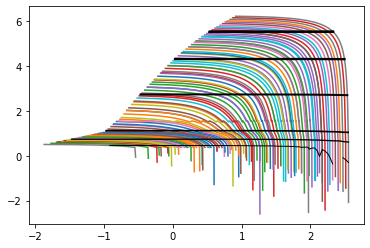

In [41]:
pl.plot(np.log10((np.nanmax(massgrid_is, axis=1)[:,None] - massgrid_is)*3).T, np.log10(lumgrid_is).T);        
massinds = np.argsort(np.nanmax(massgrid_is, axis=1))
for ii, time in enumerate(np.geomspace(1e4, 1e8, 9)):
    ind = np.argmin(np.abs(times_is - time*(u.yr/u.s).decompose()))
    masses = np.log10((np.nanmax(massgrid_is, axis=1)[:,None] - massgrid_is)*3).T[ind,massinds]
    lums = np.log10(lumgrid_is).T[ind,massinds]
    ok = np.isfinite(masses) & np.isfinite(lums)
    print(ii,ind,time,ok.sum(),np.isfinite(masses).sum(), np.isfinite(lums).sum())
    pl.plot(masses, lums,
            label=f'10$^{{{np.log10(time):0.1f}}}$',
            color='k',
            linewidth=(ii+1)/3,
           );

/scratch/local/59394008/ipykernel_29425/1683625151.py:12: RuntimeWarning: divide by zero encountered in log10
  masses = np.log10((np.nanmax(massgrid_is, axis=1)[:,None] - massgrid_is)*3).T[ind,massinds]
/scratch/local/59394008/ipykernel_29425/1683625151.py:13: RuntimeWarning: divide by zero encountered in log10
  lums = np.log10(lumgrid_is).T[ind,massinds]


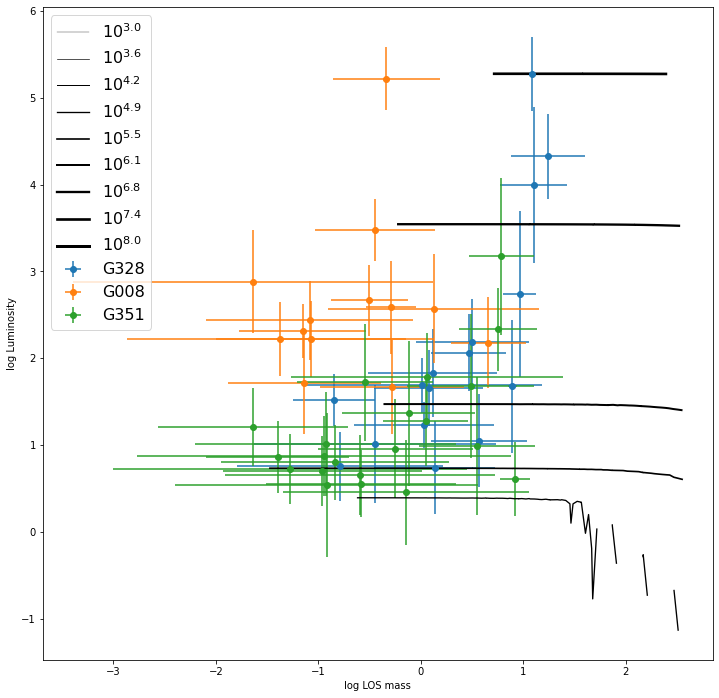

In [42]:
pl.figure(figsize=(12,12))
pl.errorbar(g328tb['LOS mass Median'], g328tb['Luminosity Median'], xerr=g328tb['LOS mass MAD'], yerr=g328tb['Luminosity MAD'], marker='o', linestyle='none', label='G328')
pl.errorbar(g008tb['LOS mass Median'], g008tb['Luminosity Median'], xerr=g008tb['LOS mass MAD'], yerr=g008tb['Luminosity MAD'], marker='o', linestyle='none', label='G008')
pl.errorbar(g351tb['LOS mass Median'], g351tb['Luminosity Median'], xerr=g351tb['LOS mass MAD'], yerr=g351tb['Luminosity MAD'], marker='o', linestyle='none', label='G351')

#pl.plot(np.log10((np.nanmax(massgrid_is, axis=1)[:,None] - massgrid_is)*3).T, np.log10(lumgrid_is).T);        


massinds = np.argsort(np.nanmax(massgrid_is, axis=1))
for ii, time in enumerate(np.geomspace(1e3, 1e8, 9)):
    ind = np.argmin(np.abs(times_is - time*(u.yr/u.s).decompose()))
    masses = np.log10((np.nanmax(massgrid_is, axis=1)[:,None] - massgrid_is)*3).T[ind,massinds]
    lums = np.log10(lumgrid_is).T[ind,massinds]
    pl.plot(masses, lums,
            label=f'10$^{{{np.log10(time):0.1f}}}$',
            color='k',
            linewidth=(ii+1)/3,
           );
      

pl.xlabel("log LOS mass")
pl.ylabel("log Luminosity")
pl.legend(loc='best', fontsize=16)

/scratch/local/59394008/ipykernel_29425/2126341490.py:13: RuntimeWarning: divide by zero encountered in log10
  masses = np.log10((final_masses - massgrid_tc)*(1/efficiency)).T[ind, massinds]
/scratch/local/59394008/ipykernel_29425/2126341490.py:14: RuntimeWarning: divide by zero encountered in log10
  lums = np.log10(lumgrid_tc).T[ind, massinds]


(-2.0, 1.5, 0.0, 6.0)

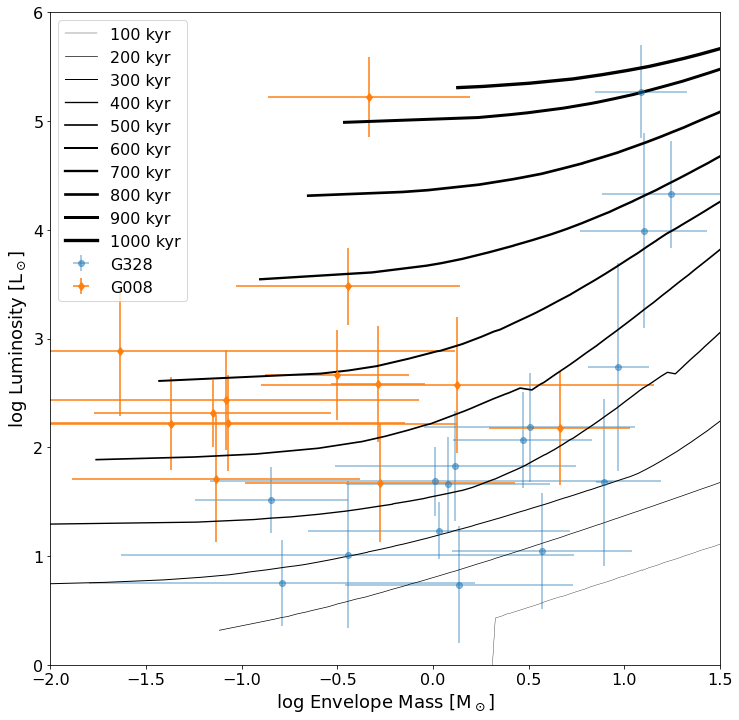

In [56]:
pl.rcParams['font.size'] = 16
pl.figure(figsize=(12,12))
pl.errorbar(g328tb['LOS mass Median'], g328tb['Luminosity Median'], xerr=g328tb['LOS mass MAD'], yerr=g328tb['Luminosity MAD'], marker='o', linestyle='none', label='G328', alpha=0.5)
pl.errorbar(g008tb['LOS mass Median'], g008tb['Luminosity Median'], xerr=g008tb['LOS mass MAD'], yerr=g008tb['Luminosity MAD'], marker='d', linestyle='none', label='G008')
#pl.errorbar(g351tb['LOS mass Median'], g351tb['Luminosity Median'], xerr=g351tb['LOS mass MAD'], yerr=g351tb['Luminosity MAD'], marker='s', linestyle='none', label='G351', alpha=0.5)


final_masses = (np.nanmax(massgrid_tc, axis=1)[:,None])
massinds = np.argsort(np.nanmax(massgrid_tc, axis=1))
for ii, time in enumerate(np.linspace(1e5,1e6,10)):
    ind = np.argmin(np.abs(times_tc - time*(u.yr/u.s).decompose()))
    efficiency=1
    masses = np.log10((final_masses - massgrid_tc)*(1/efficiency)).T[ind, massinds]
    lums = np.log10(lumgrid_tc).T[ind, massinds]
    pl.plot(masses, lums,
            label=f'{int(time/1e3):d} kyr',
            #label=f'10$^{{{np.log10(time):0.1f}}}$',
            color='k', linewidth=(ii+1)/3);
            
        
pl.xlabel("log Envelope Mass [M$_\odot$]", fontsize=18)
pl.ylabel("log Luminosity [L$_\odot$]", fontsize=18)
pl.legend(loc='best', fontsize=16)
pl.axis([-2, 1.5, 0, 6])

# Brice's tables

In [44]:
from astropy import table

In [45]:
brice_tables = table.vstack([Table.read(fn)
                             for fn in glob.glob('../BriceTingle/Region_tables/Fitted/*')])
brice_tables.add_index('ALMAIMF_FIELDID')
#brice_tables.group_by('ALMAIMF_FIELDID')[:2]

/scratch/local/59394008/ipykernel_29425/4078710769.py:14: RuntimeWarning: divide by zero encountered in log10
  masses = np.log10((final_masses - massgrid_tc)*(1/efficiency)).T[ind, massinds]
/scratch/local/59394008/ipykernel_29425/4078710769.py:15: RuntimeWarning: divide by zero encountered in log10
  lums = np.log10(lumgrid_tc).T[ind, massinds]


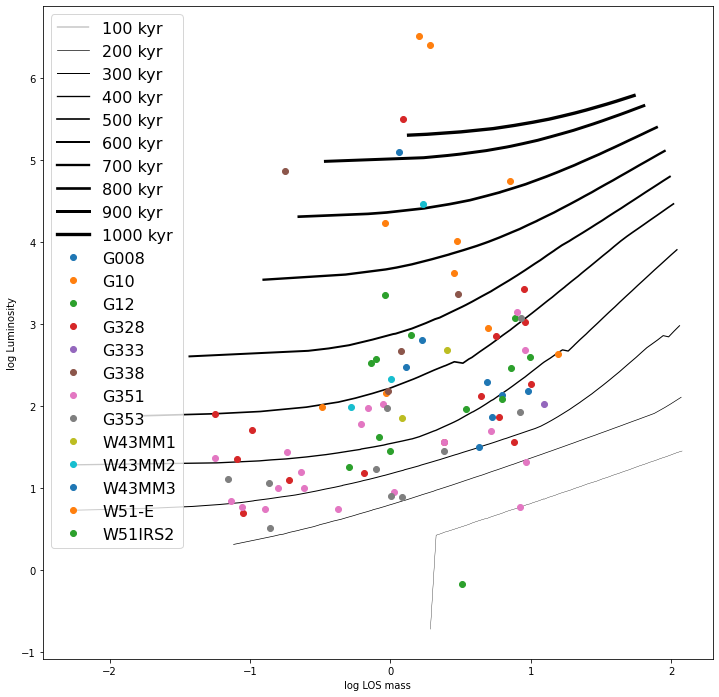

In [46]:
pl.figure(figsize=(12,12))

for fieldid in np.unique(brice_tables['ALMAIMF_FIELDID']):
    tb = brice_tables.loc[fieldid]
    pl.errorbar(tb['LOS mass Median'], tb['Luminosity Median'],
                #xerr=tb['LOS mass MAD'], yerr=tb['Luminosity MAD'],
                marker='o', linestyle='none', label=fieldid)

final_masses = (np.nanmax(massgrid_tc, axis=1)[:,None])
massinds = np.argsort(np.nanmax(massgrid_tc, axis=1))
for ii, time in enumerate(np.linspace(1e5,1e6,10)):
    ind = np.argmin(np.abs(times_tc - time*(u.yr/u.s).decompose()))
    efficiency=1
    masses = np.log10((final_masses - massgrid_tc)*(1/efficiency)).T[ind, massinds]
    lums = np.log10(lumgrid_tc).T[ind, massinds]
    pl.plot(masses, lums,
            label=f'{int(time/1e3):d} kyr',
            #label=f'10$^{{{np.log10(time):0.1f}}}$',
            color='k', linewidth=(ii+1)/3);
        
pl.xlabel("log LOS mass")
pl.ylabel("log Luminosity")
pl.legend(loc='best', fontsize=16)

/scratch/local/59394008/ipykernel_29425/3403292616.py:14: RuntimeWarning: divide by zero encountered in log10
  masses = np.log10((final_masses - massgrid_tc)*(1/efficiency)).T[ind, massinds]
/scratch/local/59394008/ipykernel_29425/3403292616.py:15: RuntimeWarning: divide by zero encountered in log10
  lums = np.log10(lumgrid_tc).T[ind, massinds]
/scratch/local/59394008/ipykernel_29425/3403292616.py:25: RuntimeWarning: divide by zero encountered in log10
  masses = np.log10((np.nanmax(massgrid_is, axis=1)[:,None] - massgrid_is)*3).T[ind,massinds]
/scratch/local/59394008/ipykernel_29425/3403292616.py:26: RuntimeWarning: divide by zero encountered in log10
  lums = np.log10(lumgrid_is).T[ind,massinds]


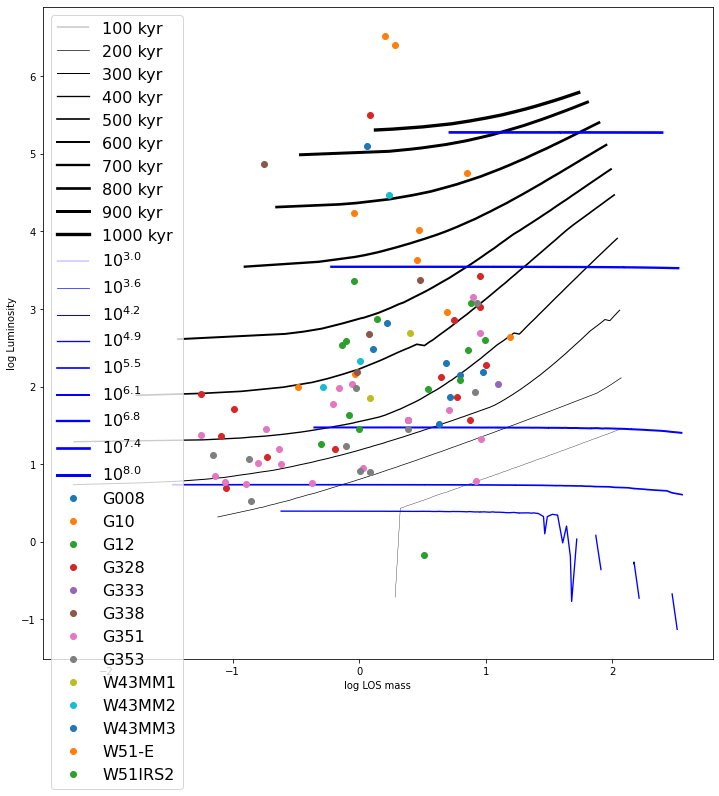

In [47]:
pl.figure(figsize=(12,12))

for fieldid in np.unique(brice_tables['ALMAIMF_FIELDID']):
    tb = brice_tables.loc[fieldid]
    pl.errorbar(tb['LOS mass Median'], tb['Luminosity Median'],
                #xerr=tb['LOS mass MAD'], yerr=tb['Luminosity MAD'],
                marker='o', linestyle='none', label=fieldid)

final_masses = (np.nanmax(massgrid_tc, axis=1)[:,None])
massinds = np.argsort(np.nanmax(massgrid_tc, axis=1))
for ii, time in enumerate(np.linspace(1e5,1e6,10)):
    ind = np.argmin(np.abs(times_tc - time*(u.yr/u.s).decompose()))
    efficiency=1
    masses = np.log10((final_masses - massgrid_tc)*(1/efficiency)).T[ind, massinds]
    lums = np.log10(lumgrid_tc).T[ind, massinds]
    pl.plot(masses, lums,
            label=f'{int(time/1e3):d} kyr',
            #label=f'10$^{{{np.log10(time):0.1f}}}$',
            color='k', linewidth=(ii+1)/3);
    
    
massinds = np.argsort(np.nanmax(massgrid_is, axis=1))
for ii, time in enumerate(np.geomspace(1e3, 1e8, 9)):
    ind = np.argmin(np.abs(times_is - time*(u.yr/u.s).decompose()))
    masses = np.log10((np.nanmax(massgrid_is, axis=1)[:,None] - massgrid_is)*3).T[ind,massinds]
    lums = np.log10(lumgrid_is).T[ind,massinds]
    pl.plot(masses, lums,
            label=f'10$^{{{np.log10(time):0.1f}}}$',
            color='b',
            linewidth=(ii+1)/3,
           );
      

        
pl.xlabel("log LOS mass")
pl.ylabel("log Luminosity")
pl.legend(loc='best', fontsize=16)